# Exploration of Google Apps and Predicting Rating of the Apps

## Content
The dataset includes 10841 google apps with 13 features. 

## Goal of the project
I need to answer three different business questions in order to learn more about this dataset

###  Gather

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [4]:
df = pd.read_csv('googleplaystore.csv')

In [171]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [164]:
df2 = pd.read_csv('googleplaystore_user_reviews.csv')

### Assess first dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Assess second dataframe

In [10]:
df2.dropna(inplace=True)

In [11]:
avg_df = df2.groupby('App', as_index=False)['Sentiment_Polarity'].median()

In [12]:
avg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 864
Data columns (total 2 columns):
App                   865 non-null object
Sentiment_Polarity    865 non-null float64
dtypes: float64(1), object(1)
memory usage: 20.3+ KB


### Observations:
Original idea was to find out the average sentiment of every app and connect it to the primary datafram. 

Unfortunately, reviews are only given for 865 apps. 

### Clean

- Make sure datatypes are correct for every column
- Delete "+" in installs 
- Divide Genres
- Delete "and up" in Android Ver
- Dummy variables 
- Delete NAs

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [174]:
df['Installs'] = df['Installs'].str.replace('+','')

In [175]:
df['Android Ver'] = df['Android Ver'].str.replace(' and up','')

In [176]:
def value_to_float(x):
    '''
    INPUT: column from a dataframe
    OUTPUT: transformed column from a dataframe
    
    This function transforms letters K, M, and B into actual numbers
    for thousands, millions, billions'''
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

df.Size = df.Size.apply(value_to_float)

In [177]:
df['Genre2'] = df['Genres'].str.split(';',1).str[1]

In [178]:
df['Genre1'] = df['Genres'].str.split(';',1).str[0]

In [179]:
df.drop(['Genres'],axis=1, inplace=True)

In [180]:
df.drop(['Genre2'],axis=1, inplace=True)

In [181]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000",Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000",Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000",Free,0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000",Free,0,Everyone,"June 20, 2018",1.1,4.4,Art & Design


In [182]:
df['Year'] = df['Last Updated'].str.split(',',1).str[1]

In [183]:
df['Month'] = df['Last Updated'].str.split(' ',1).str[0]

In [184]:
df['D'] = df['Last Updated'].str.split(' ',1).str[1]

In [185]:
df['Day'] = df['D'].str.split(',',1).str[0]

In [186]:
df.drop(['Last Updated','D'],axis=1, inplace=True)

In [189]:
df['Rating'] = df['Rating'].astype(float)

In [190]:
df['Reviews'] = df['Reviews'].str.replace('3.0M','3000000')

In [191]:
df['Reviews'] = df['Reviews'].astype(int)


In [192]:
df['Installs'] = df['Installs'].str.replace(',','')

In [193]:
df['Installs'] = df['Installs'].str.replace('Free','0')

In [194]:
df['Installs'] = df['Installs'].astype(int)


In [195]:
df['Price'] = df['Price'].str.replace('$','')

In [196]:
df['Price'] = df['Price'].str.replace('Everyone','0')

In [197]:
df['Price'] = df['Price'].astype(float)

In [198]:
df = df[df['Rating'] != 19]

In [200]:
df.dropna(inplace=True)

/anaconda3/envs/Metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [202]:
mean_size = df['Size'].mean(skipna=True)
df['Size'] = df['Size'].mask(df.Size == 0, mean_size)

/anaconda3/envs/Metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##  Analyze

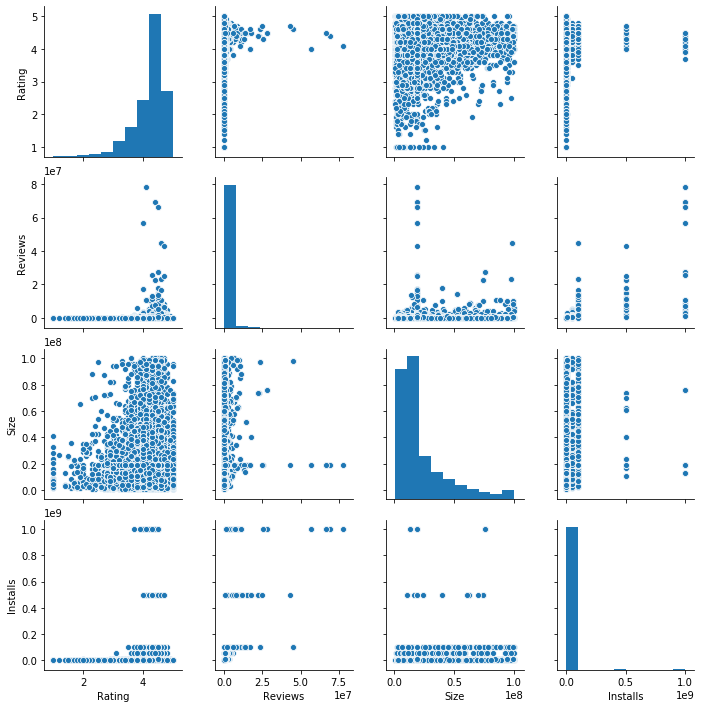

In [207]:
sns.pairplot(df[['Rating','Reviews','Size','Installs']])

### Visualize 

## Question 1:

## What quantitative feature is the most correlated to a rating of apps?

In [35]:
df[['Rating','Reviews','Size','Installs']].corr()

,Rating,Reviews,Size,Installs
Rating,1.000000,0.068133,0.045840,0.051337
Reviews,0.068133,1.000000,0.062338,0.641605
Size,0.045840,0.062338,1.000000,-0.010315
Installs,0.051337,0.641605,-0.010315,1.000000


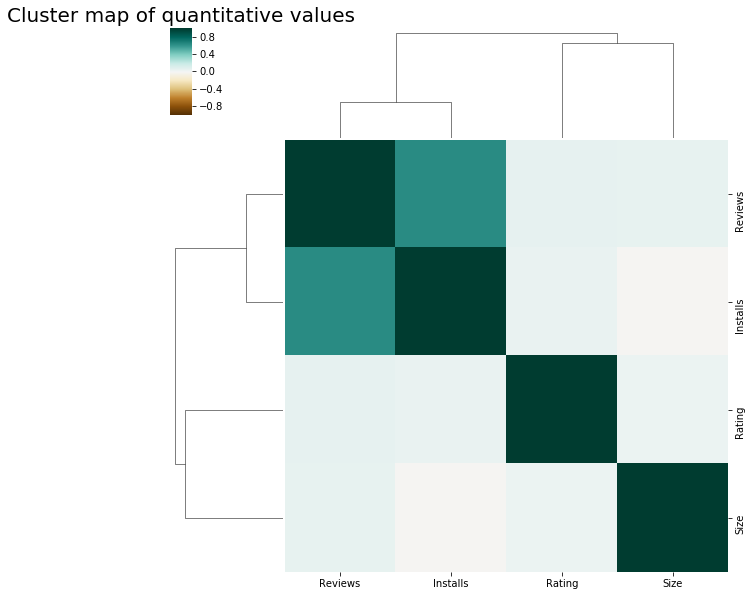

In [57]:
sns.clustermap(df[['Rating','Reviews','Size','Installs']].corr(),cmap= "BrBG",vmin=-1,vmax=1)
plt.title('Cluster map of quantitative values', fontsize=20);

## Question 2:

### What category has the highest amount of apps?

In [157]:
sns.set(style="darkgrid")
colors = ["amber", "windows blue", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))


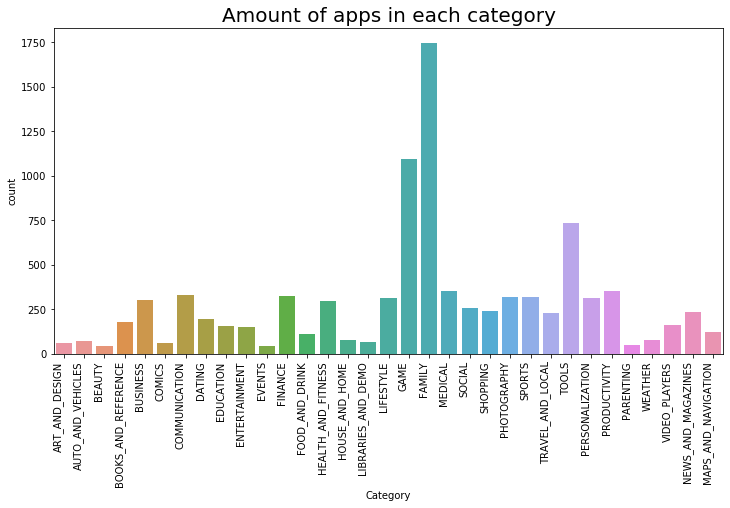

In [147]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Category', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax
plt.title('Amount of apps in each category',fontsize=20);

## Question 3:

### What is the average rating of the apps in different categories?

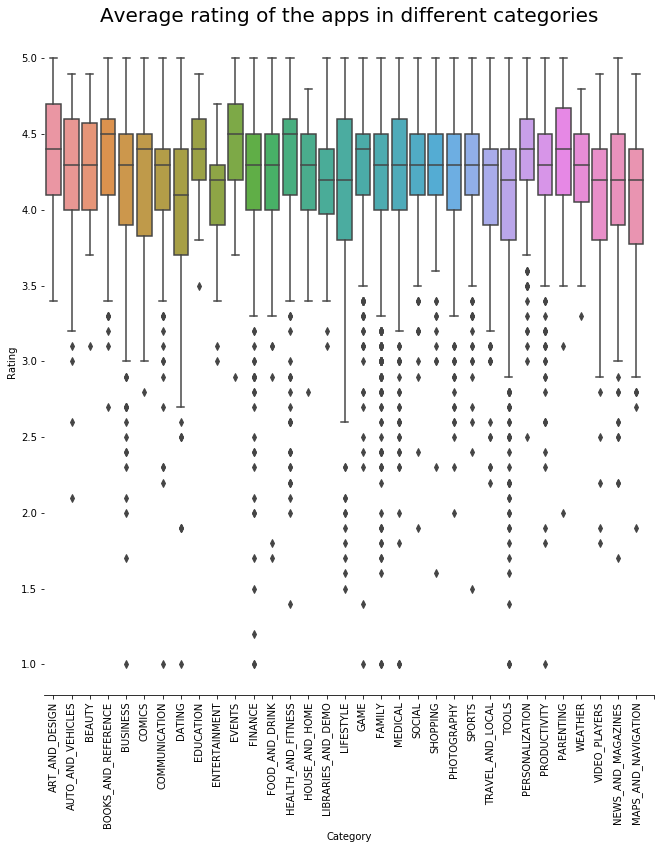

In [145]:
ax =  sns.catplot(x='Category',y='Rating', data=df, kind='box',height=10)
ax.despine(left=True)
ax.set_xticklabels(rotation=90)
ax.set(xticks=range(0,34))
ax = ax.set_ylabels('Rating')
plt.title('Average rating of the apps in different categories', size=20);

In [130]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Current Ver,Android Ver,Genre1,Year,Month,Day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,1.0.0,4.0.3,Art & Design,2018,January,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,2.0.0,4.0.3,Art & Design,2018,January,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,1.2.4,4.0.3,Art & Design,2018,August,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Varies with device,4.2,Art & Design,2018,June,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,1.1,4.4,Art & Design,2018,June,20


## Datatypes are correct, moving forward with preparation for modeling 

In [233]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    df = df.dropna(subset=['Rating'],axis=0)
    y = df['Rating']
    
    #X_add = np.log(df[['Reviews','Installs']])
    #df = df.drop(['Rating','App','Current Ver','Android Ver','Day','Genre1'], axis=1)
    df = df.drop(['Rating','Price','Current Ver','Android Ver','Genre1','Day','App'], axis=1)

    #Numeric variables 
    num_var = df.select_dtypes(include=['float','int']).columns
    for col in num_var:
        df[col].fillna((df[col].mean()),inplace=True)
        
    #Categorical variables 
    cat_var = df.select_dtypes(include=['object']).columns
    for col in cat_var:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col],prefix=col,prefix_sep='_')],axis=1)
     
    
    X = df
    return X,y

In [234]:
X,y = clean_data(df)

In [222]:
y.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [224]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

In [225]:
from sklearn.preprocessing import StandardScaler

### Model

## Linear Regression

In [236]:
from sklearn import preprocessing

In [237]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state=42)

In [238]:
# mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
mm_scaler.transform(X_test)

array([[3.22345783e-04, 2.02020202e-01, 9.99999001e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49412254e-03, 3.03030303e-02, 9.99999901e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.44020523e-03, 3.13131313e-01, 9.99999001e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.30504365e-06, 3.53535354e-01, 9.99900001e-06, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.55890913e-07, 2.52525253e-01, 4.99900000e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.20183722e-05, 6.36363636e-02, 4.99999000e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [229]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_minmax)
# X_test_scaled = scaler.fit_transform(X_test)

In [239]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train_minmax, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [240]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train_minmax)

In [267]:
y_test_preds

array([564433.109375  , 172221.72460938, 897051.234375  , ...,
       963814.5703125 , 696085.74609375, 194185.70703125])

In [241]:
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
test_score, train_score

(-2.699086400294122e+24, 0.07620407138681007)

### Visualize

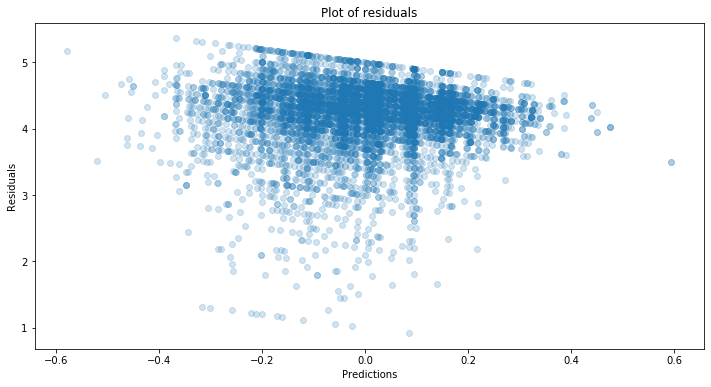

In [242]:
plt.figure(figsize=(12,6))

plt.scatter(fit.predict(), fit.resid, alpha =0.2)
plt.title('Plot of residuals')
plt.xlabel('Predictions')
plt.ylabel('Residuals');


### Observations:

- The R-squared of the model is 0.076 for the train set and -2.699 for the test set. 
- The low r squared can indicate few things:
        - overfitting 
        - not enought features to predict

### Summary 
The R-squared is too low, let's try the model that does not require scaling and normalization. 

## XGBoost

In [243]:
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [244]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=2018)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_2, y_train_2, test_size=0.2, random_state=2019)

def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [245]:
gbm = xgb.XGBRegressor( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="reg:linear",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(X_train_2,y_train_2),(X_val_2,y_val_2)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_train_2, y_train_2, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )

[0]	validation_0-rmse:3.35728	validation_1-rmse:3.37346
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:3.02985	validation_1-rmse:3.04603
[2]	validation_0-rmse:2.73586	validation_1-rmse:2.75212


/anaconda3/envs/Metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[3]	validation_0-rmse:2.472	validation_1-rmse:2.48792
[4]	validation_0-rmse:2.23551	validation_1-rmse:2.25129
[5]	validation_0-rmse:2.02374	validation_1-rmse:2.03937
[6]	validation_0-rmse:1.83439	validation_1-rmse:1.84989
[7]	validation_0-rmse:1.66514	validation_1-rmse:1.68035
[8]	validation_0-rmse:1.51423	validation_1-rmse:1.52921
[9]	validation_0-rmse:1.3798	validation_1-rmse:1.39423
[10]	validation_0-rmse:1.26035	validation_1-rmse:1.27438
[11]	validation_0-rmse:1.15449	validation_1-rmse:1.1682
[12]	validation_0-rmse:1.06092	validation_1-rmse:1.0743
[13]	validation_0-rmse:0.978476	validation_1-rmse:0.991617
[14]	validation_0-rmse:0.905937	validation_1-rmse:0.918672
[15]	validation_0-rmse:0.84265	validation_1-rmse:0.855409
[16]	validation_0-rmse:0.787748	validation_1-rmse:0.800086
[17]	validation_0-rmse:0.739952	validation_1-rmse:0.751855
[18]	validation_0-rmse:0.699067	validation_1-rmse:0.71056
[19]	validation_0-rmse:0.663995	validation_1-rmse:0.67507
[20]	validation_0-rmse:0.63388	v

[143]	validation_0-rmse:0.451734	validation_1-rmse:0.46879
[144]	validation_0-rmse:0.451477	validation_1-rmse:0.468619
[145]	validation_0-rmse:0.451368	validation_1-rmse:0.468523
[146]	validation_0-rmse:0.451144	validation_1-rmse:0.468508
[147]	validation_0-rmse:0.451027	validation_1-rmse:0.468479
[148]	validation_0-rmse:0.450954	validation_1-rmse:0.468457
[149]	validation_0-rmse:0.450495	validation_1-rmse:0.46785
[150]	validation_0-rmse:0.450361	validation_1-rmse:0.467748
[151]	validation_0-rmse:0.450218	validation_1-rmse:0.467621
[152]	validation_0-rmse:0.450083	validation_1-rmse:0.467463
[153]	validation_0-rmse:0.450034	validation_1-rmse:0.467462
[154]	validation_0-rmse:0.449958	validation_1-rmse:0.467522
[155]	validation_0-rmse:0.449826	validation_1-rmse:0.467526
[156]	validation_0-rmse:0.449669	validation_1-rmse:0.467453
[157]	validation_0-rmse:0.449372	validation_1-rmse:0.467665
[158]	validation_0-rmse:0.449238	validation_1-rmse:0.467605
[159]	validation_0-rmse:0.449073	validatio

In [247]:
rmse(gbm.predict(X_test_2, ntree_limit=gbm.best_ntree_limit),y_test_2) 

0.44096724135785237

In [285]:
r2_score(gbm.predict(X_test_2, ntree_limit=gbm.best_ntree_limit),y_test_2) 

-3.327666913459897

In [249]:
rmse(gbm.predict(X_val_2, ntree_limit=gbm.best_ntree_limit),y_val_2) 

0.46344176555327327

In [250]:
def coef_importance(features, X_train):
    '''
    INPUT:
    features - the feature importances of the XGBoost model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    features_df - a dataframe holding the coefficient and features importances
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a XGBoost model.
    '''
    features_df = pd.DataFrame()
    features_df['Features'] = X_train.columns
    features_df['Importance'] = gbm.feature_importances_
    features_df = features_df.sort_values('Importance', ascending=False)
    return features_df

In [251]:
coef_df = coef_importance(gbm.feature_importances_, X_train_2)

In [252]:
coef_df.head()

,Features,Importance
52,Year_ 2018,0.090232
31,Category_SPORTS,0.048648
36,Type_Free,0.038237
32,Category_TOOLS,0.037281
46,Year_ 2012,0.033210


### Visualize

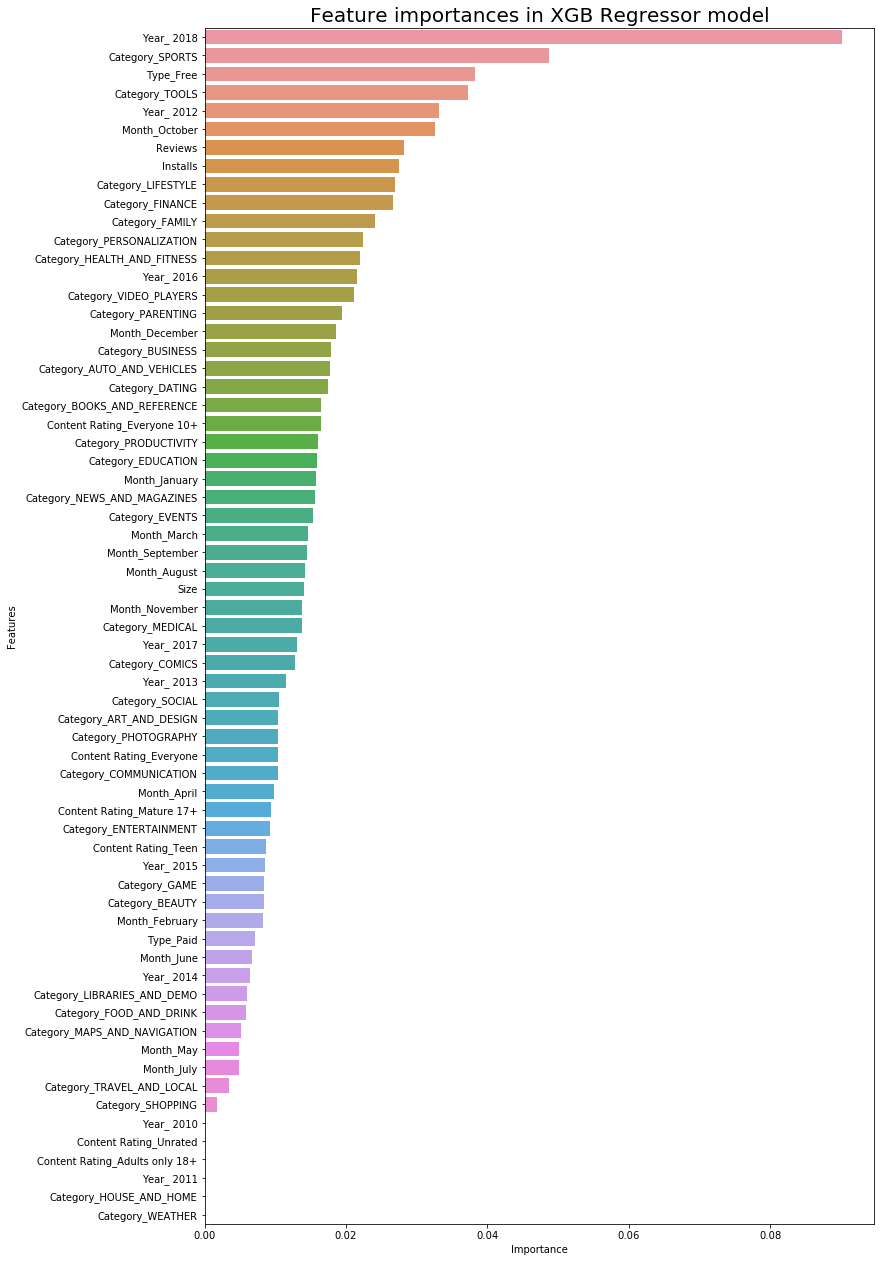

In [273]:
plt.figure(figsize=(12,22))
sns.barplot(x='Importance',y='Features', data=coef_df)
plt.title('Feature importances in XGB Regressor model',fontsize=20);

In [175]:
df['Rating'].value_counts()

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

## Random Forest

In [150]:
from sklearn import metrics

In [254]:
def Evaluation(y_true,y_predict):
    ''' 
    INPUT:
    y_true - Traget value in a test set
    y_predict - predicted value from the model
    OUTPUT:
    Evaluation of the model using: Mean Squared Error, Mean Absulute Error,Mean Squared Log Error
    '''
    print('Mean Squared Error: ' + str(metrics.mean_squared_error(y_true, y_predict)))
    print('Mean Absulute Error: ' + str(metrics.mean_absolute_error(y_true, y_predict)))
    print('Mean Squared Log Error: ' + str(metrics.mean_squared_log_error(y_true,y_predict)))


In [274]:
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    ''' 
    INPUT:
    y_true - Traget value in a test set
    y_predict - predicted value from the model
    OUTPUT:
    Evaluation of the model using: Mean Squared Error, Mean Absulute Error,Mean Squared Log Error
    '''
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix


In [275]:
from sklearn.ensemble import RandomForestRegressor

In [276]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.30)

In [277]:
X_train_r.head()

,Reviews,Size,Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Year_ 2010,Year_ 2011,Year_ 2012,Year_ 2013,Year_ 2014,Year_ 2015,Year_ 2016,Year_ 2017,Year_ 2018,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
3294,618918,1.894124e+07,50000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4840,99,1.900000e+07,10000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
670,42197,1.894124e+07,5000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
5349,1133393,1.894124e+07,10000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
5567,20,3.600000e+07,1000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [278]:
model3 = RandomForestRegressor()
model3.fit(X_train_r, y_train_r)
result3 = model3.predict(X_test_r)

/anaconda3/envs/Metis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [279]:
resultsdf = pd.DataFrame()
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_r,result3, name = 'RFR - Integer'),ignore_index = True)

In [280]:
resultsdf

,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Series Name
0,0.324294,0.24931,0.012071,RFR - Integer


In [281]:
r_squared = r2_score(y_test_r,result3 )
r_squared

0.08622470868402632

In [282]:
coef_df_2 = coef_importance(model3.feature_importances_, X_train_2)

### Visualize

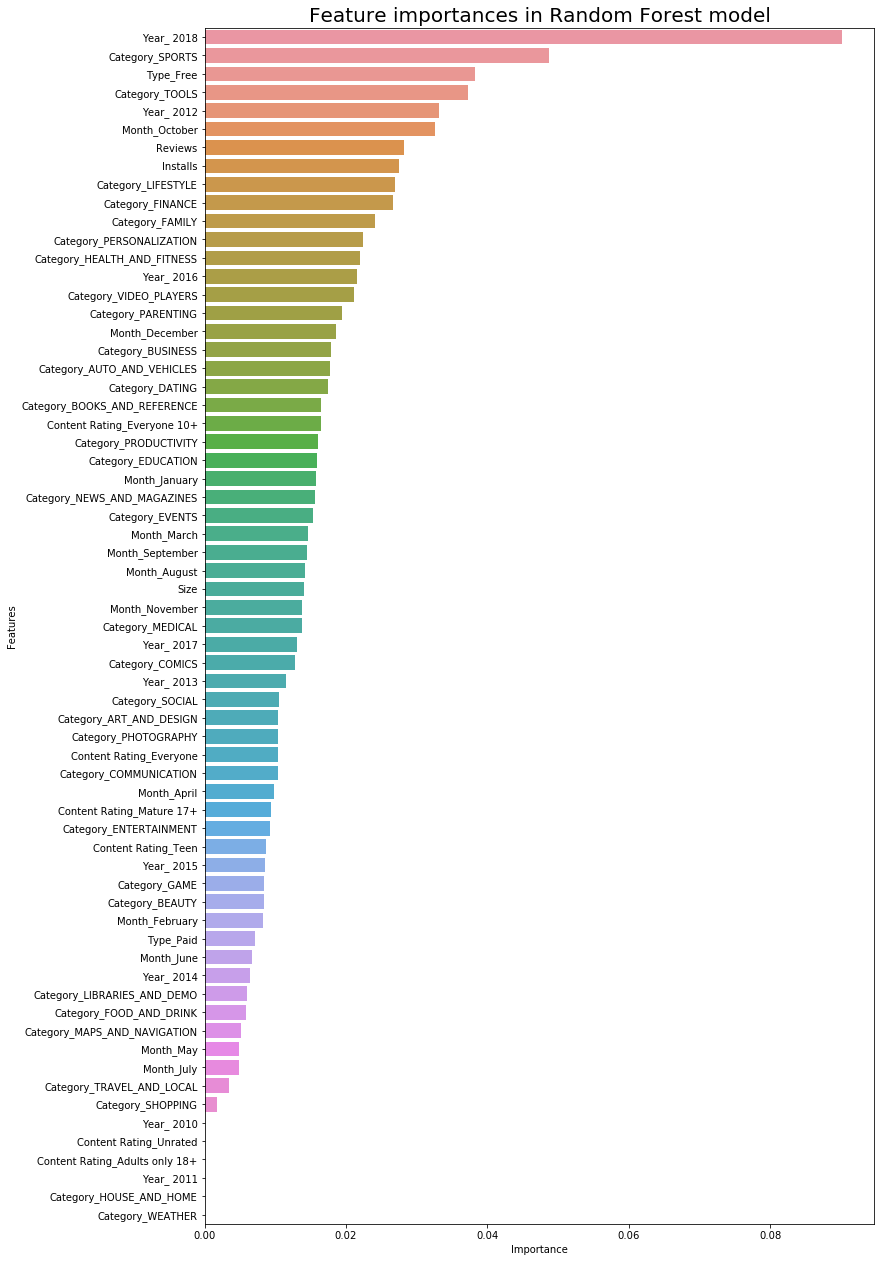

In [283]:
plt.figure(figsize=(12,22))
sns.barplot(x='Importance',y='Features', data=coef_df_2)
plt.title('Feature importances in Random Forest model',fontsize=20);

### Summary 

1. After trying out different models like: Linear Regression, XGBoost Regressor, Random Forest Regressor I was not able to get the ideal model. 
2. The highest r squared is 0.08, which means only 8% of the model is explained. 

#### The features of the model are not crucial to predict the rating of different apps. 

